In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('predict_sales.csv')

In [3]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
data.shape

(8523, 12)

In [5]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

# Univariate Analysis

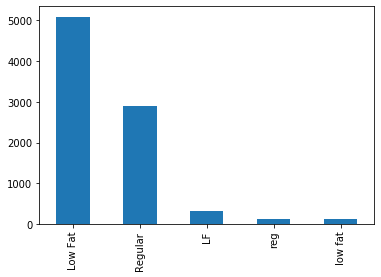

In [7]:
data.Item_Fat_Content.value_counts().plot.bar()

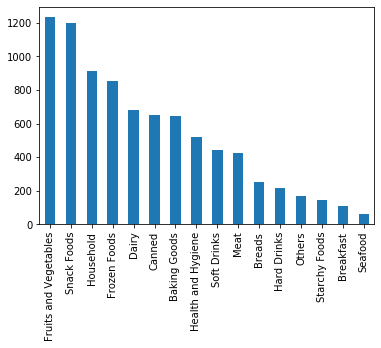

In [8]:
data.Item_Type.value_counts().plot.bar()

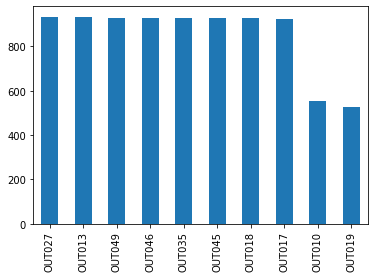

In [9]:
data.Outlet_Identifier.value_counts().plot.bar()

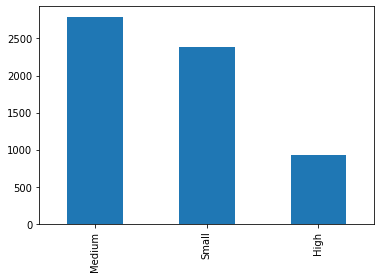

In [10]:
data.Outlet_Size.value_counts().plot.bar()

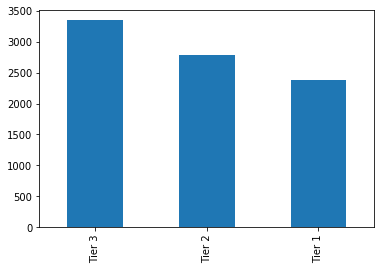

In [11]:
data.Outlet_Location_Type.value_counts().plot.bar()

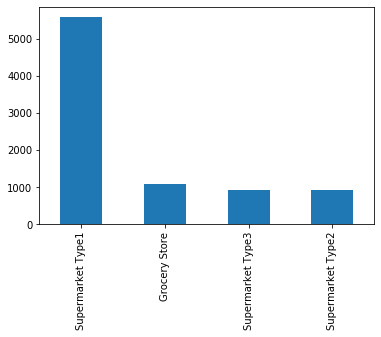

In [12]:
data.Outlet_Type.value_counts().plot.bar()

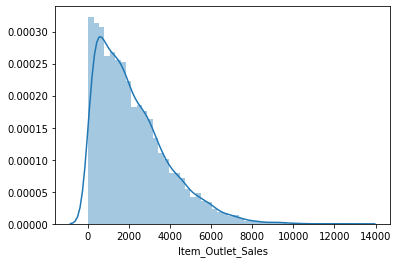

In [13]:
sns.distplot(data.Item_Outlet_Sales)

# Bivariate analysis

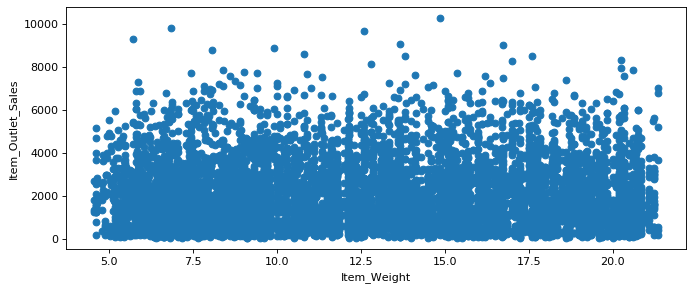

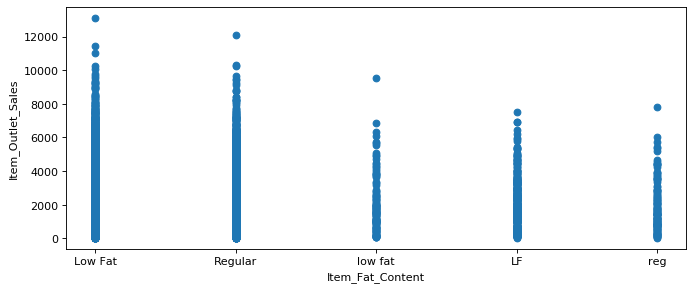

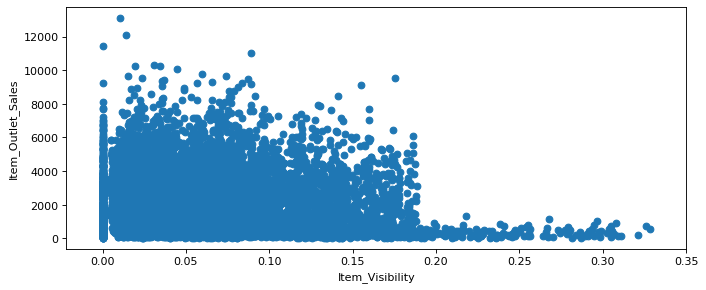

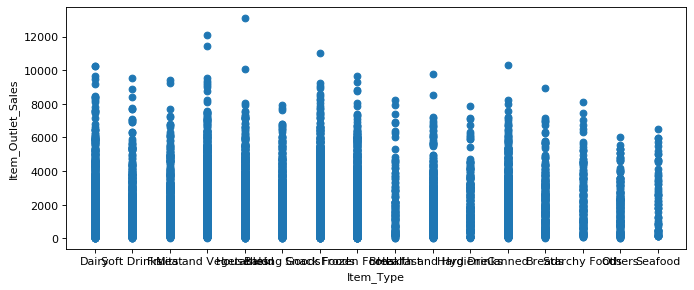

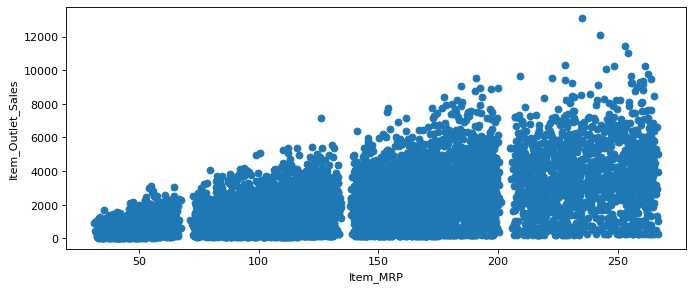

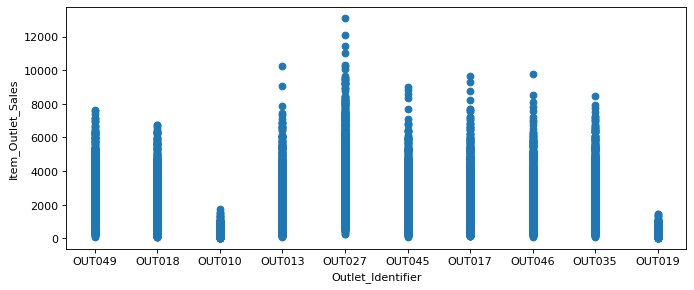

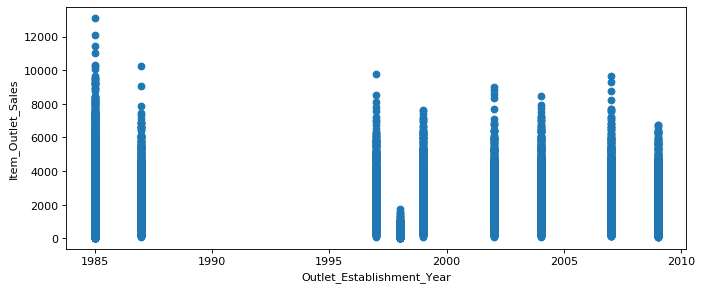

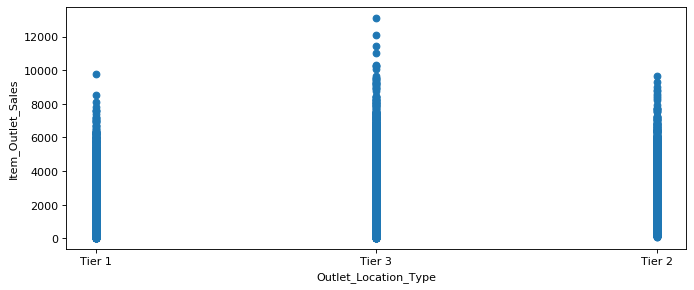

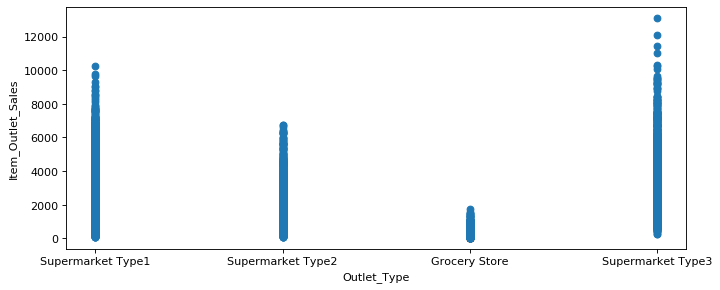

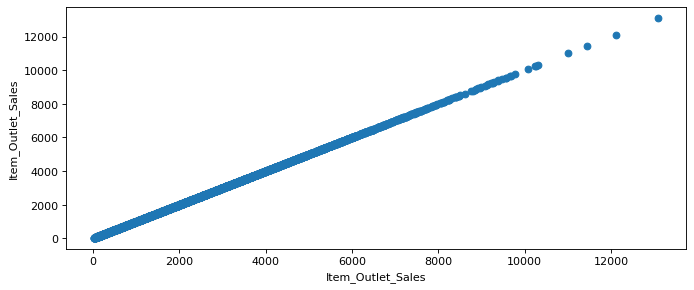

In [14]:
for col in data.columns:
    if col not in ['Outlet_Size', 'Item_Identifier']:
        plt.figure(figsize=(10, 4), dpi=80)
        plt.scatter(data[col], data.Item_Outlet_Sales)
        plt.xlabel(col)
        plt.ylabel('Item_Outlet_Sales')
        plt.show()

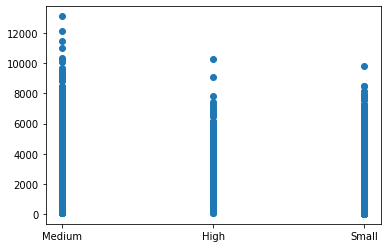

In [15]:
plt.scatter(data.loc[data['Outlet_Size'].notnull(), 'Outlet_Size'], data.loc[data['Outlet_Size'].notnull(), 'Item_Outlet_Sales'])

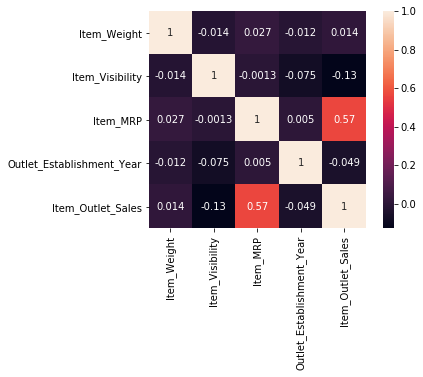

In [16]:
sns.heatmap(data.corr(), vmax=1, square=True, annot=True)

In [17]:
data['Item_Type_Combined'] = data.Item_Identifier.apply(lambda x:x[0:2])

In [18]:
data['Item_Type_Combined'].value_counts()

FD    6125
NC    1599
DR     799
Name: Item_Type_Combined, dtype: int64

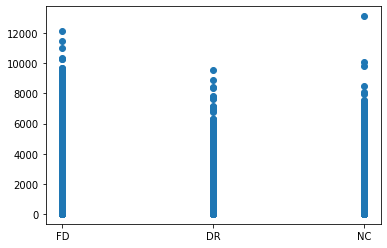

In [19]:
plt.scatter(data.Item_Type_Combined, data.Item_Outlet_Sales)

In [20]:
pd.crosstab(data.Item_Type_Combined, data.Item_Type)

Item_Type,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
Item_Type_Combined,,,,,,,,,,,,,,,,
DR,0,0,0,0,140,0,0,214,0,0,0,0,0,0,445,0
FD,648,251,110,649,542,856,1232,0,0,0,425,0,64,1200,0,148
NC,0,0,0,0,0,0,0,0,520,910,0,169,0,0,0,0


# Feature Engineering

In [21]:
data.Outlet_Establishment_Year = 2013 - data.Outlet_Establishment_Year

In [22]:
data.drop('Item_Identifier', axis=1, inplace=True)

In [23]:
category_columns = data.select_dtypes(['object']).columns

In [24]:
data.loc[data.Item_Weight.isnull(), 'Item_Type'].value_counts()
categorical_columns = data.select_dtypes(['object', 'category']).columns

In [25]:
for col in category_columns:
    print("Unique value counts in " + col + "---------")
    print(data[col].value_counts())

Unique value counts in Item_Fat_Content---------
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
Unique value counts in Item_Type---------
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
Unique value counts in Outlet_Identifier---------
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64
Unique value counts in Outlet_Size---------
Medium    

# Imputing Missing Values

In [26]:
from sklearn.impute import SimpleImputer

In [27]:
item_weight = data.loc[:, ['Item_Type', 'Item_Weight']]
item_weight.groupby('Item_Type').mean()

,Item_Weight
Item_Type,
Baking Goods,12.277108
Breads,11.346936
Breakfast,12.768202
Canned,12.305705
Dairy,13.426069
Frozen Foods,12.867061
Fruits and Vegetables,13.224769
Hard Drinks,11.400328
Health and Hygiene,13.142314


In [28]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [29]:
data['Item_Weight'] = imputer.fit_transform(data[['Item_Weight']])

In [30]:
data.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [31]:
outlet_size = data.loc[:, ['Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']]
outlet_size.groupby(['Outlet_Type']).Outlet_Size.value_counts()

Outlet_Type        Outlet_Size
Grocery Store      Small           528
Supermarket Type1  Small          1860
                   High            932
                   Medium          930
Supermarket Type2  Medium          928
Supermarket Type3  Medium          935
Name: Outlet_Size, dtype: int64

In [32]:
outlet_size.loc[outlet_size.Outlet_Size.isnull(), 'Outlet_Type'].value_counts()

Supermarket Type1    1855
Grocery Store         555
Name: Outlet_Type, dtype: int64

In [33]:
outlet_size.loc[outlet_size.Outlet_Size.isnull(), 'Outlet_Location_Type'].value_counts()

Tier 2    1855
Tier 3     555
Name: Outlet_Location_Type, dtype: int64

In [34]:
pd.crosstab(outlet_size.Outlet_Type, outlet_size.Outlet_Location_Type)

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Type,,,
Grocery Store,528,0,555
Supermarket Type1,1860,2785,932
Supermarket Type2,0,0,928
Supermarket Type3,0,0,935


In [35]:
outlet_size.loc[(outlet_size.Outlet_Type == 'Grocery Store'), 'Outlet_Size' ].value_counts()

Small    528
Name: Outlet_Size, dtype: int64

In [36]:
outlet_size.loc[(outlet_size.Outlet_Location_Type == 'Tier 3'), 'Outlet_Size' ].value_counts()

Medium    1863
High       932
Name: Outlet_Size, dtype: int64

In [37]:
data.loc[data.Outlet_Size.isnull(), 'Outlet_Size'] = 'Medium'

In [38]:
category_columns

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Type_Combined'],
      dtype='object')

In [39]:
sum(data.Item_Visibility == 0)

526

In [40]:
data.loc[data.Item_Visibility == 0, 'Item_Visibility'] = data.Item_Visibility.mean()

# Creating dummies for Categorical Columns

In [41]:
data = pd.get_dummies(data, columns = category_columns, prefix= category_columns, drop_first=True)

In [42]:
data.shape

(8523, 42)

In [43]:
data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Breads,...,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_FD,Item_Type_Combined_NC
0,9.30,0.016047,249.8092,14,3735.1380,1,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
1,5.92,0.019278,48.2692,4,443.4228,0,1,0,0,0,...,0,1,0,0,1,0,1,0,0,0
2,17.50,0.016760,141.6180,14,2097.2700,1,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
3,19.20,0.066132,182.0950,15,732.3800,0,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
4,8.93,0.066132,53.8614,26,994.7052,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1


# Model

In [44]:
X = data.drop('Item_Outlet_Sales', axis=1)
Y = data.loc[:, 'Item_Outlet_Sales']

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [47]:
linear_regressor = LinearRegression()

In [48]:
linear_regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
lr_predict = linear_regressor.predict(X_test)

In [50]:
mean_absolute_error(Y_test, lr_predict)

853.0839458969998

In [51]:
list(zip(X_train.columns, linear_regressor.coef_))

[('Item_Weight', -1.6346158788038756),
 ('Item_Visibility', -244.57243752590827),
 ('Item_MRP', 15.548647578832988),
 ('Outlet_Establishment_Year', 25.420099996147705),
 ('Item_Fat_Content_Low Fat', 27.803440791465466),
 ('Item_Fat_Content_Regular', 71.39660586913404),
 ('Item_Fat_Content_low fat', 153.50444082402163),
 ('Item_Fat_Content_reg', -98.33871194140552),
 ('Item_Type_Breads', -62.122345391367965),
 ('Item_Type_Breakfast', -4.457602890192979),
 ('Item_Type_Canned', 14.465624588271286),
 ('Item_Type_Dairy', -137.28742751830364),
 ('Item_Type_Frozen Foods', -66.13316206286417),
 ('Item_Type_Fruits and Vegetables', -11.913272923676184),
 ('Item_Type_Hard Drinks', -102.73493398489188),
 ('Item_Type_Health and Hygiene', -30.22477510040426),
 ('Item_Type_Household', -48.33209007513621),
 ('Item_Type_Meat', -21.933797856307624),
 ('Item_Type_Others', -20.931635365869557),
 ('Item_Type_Seafood', 175.25982910185348),
 ('Item_Type_Snack Foods', -27.56501799403869),
 ('Item_Type_Soft Dr

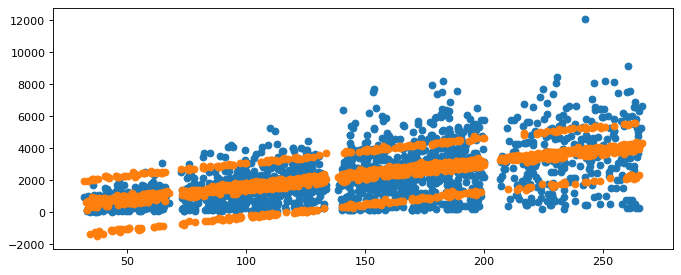

In [52]:
plt.figure(figsize=(10, 4), dpi=80)
plt.scatter(X_test.Item_MRP, Y_test)
plt.scatter(X_test.Item_MRP, lr_predict)
plt.show()

In [53]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

In [54]:
ridge_model = Ridge(fit_intercept=True)
params = {
    'alpha':np.linspace(0.01, 10, 20),
}

In [55]:
ridge_search = GridSearchCV(ridge_model, param_grid=params, cv=10, scoring='neg_mean_absolute_error')

In [56]:
ridge_search.fit(X_train, Y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([ 0.01      ,  0.53578947,  1.06157895,  1.58736842,  2.11315789,
        2.63894737,  3.16473684,  3.69052632,  4.21631579,  4.74210526,
        5.26789474,  5.79368421,  6.31947368,  6.84526316,  7.37105263,
        7.89684211,  8.42263158,  8.94842105,  9.47421053, 10.        ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=0)

In [57]:
ridge_predict = ridge_search.predict(X_test)

In [58]:
mean_absolute_error(Y_test, ridge_predict)

852.9349086299212

In [59]:
lasso_model = Lasso(fit_intercept=True)
params = {
    'alpha': np.linspace(0.01, 10, 20)
}

In [60]:
lasso_search = GridSearchCV(lasso_model, param_grid=params, cv=10, scoring='neg_mean_absolute_error')

In [61]:
lasso_search.fit(X_train, Y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([ 0.01      ,  0.53578947,  1.06157895,  1.58736842,  2.11315789,
        2.63894737,  3.16473684,  3.69052632,  4.21631579,  4.74210526,
        5.26789474,  5.79368421,  6.31947368,  6.84526316,  7.37105263,
        7.89684211,  8.42263158,  8.94842105,  9.47421053, 10.        ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=0)

In [62]:
lasso_predict = lasso_search.predict(X_test)

In [63]:
mean_absolute_error(Y_test, lasso_predict)

851.5953555399416

# Decision Tree

In [64]:
from sklearn.tree import DecisionTreeRegressor

In [65]:
d_regressor = DecisionTreeRegressor(random_state=0)

In [66]:
params = {
    'max_depth':np.arange(1, 10),
    'min_samples_split': [2, 5, 10, None],
    'min_samples_leaf': [1, 5, 10, None]
}

In [67]:
from sklearn.model_selection import RandomizedSearchCV

In [68]:
d_search = RandomizedSearchCV(d_regressor, param_distributions=params, cv=10, scoring='neg_mean_absolute_error')

In [69]:
d_search.fit(X_train, Y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort='deprecated',
                                                   random_state=42,
                                                   splitter='best'),
                   iid='de

In [70]:
d_regressor = d_search.best_estimator_

In [71]:
d_regressor.fit(X_train, Y_train)
d_predict = d_regressor.predict(X_test)

In [72]:
mean_absolute_error(Y_test, d_predict)

779.0184748609299

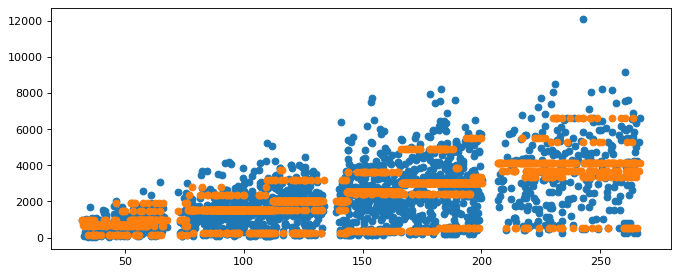

In [73]:
plt.figure(figsize=(10, 4), dpi=80)
plt.scatter(X_test.Item_MRP, Y_test)
plt.scatter(X_test.Item_MRP, d_predict)
plt.show()

# Random Forest

In [74]:
from sklearn.ensemble import RandomForestRegressor

In [75]:
params = {
    'bootstrap': [True, False],
    'max_depth': [10, 20, 30, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [100, 200, 300]
}

In [76]:
rf_regressor = RandomForestRegressor()

In [77]:
rf_search = RandomizedSearchCV(rf_regressor, param_distributions=params, n_iter=20, scoring='neg_mean_absolute_error')

In [78]:
rf_search.fit(X_train, Y_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                           

In [79]:
rf_regressor = rf_search.best_estimator_

In [80]:
rf_regressor.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [81]:
rf_predict = rf_regressor.predict(X_test)

In [82]:
mean_absolute_error(Y_test, rf_predict)

782.2291214313459

In [83]:
imp_feature = pd.DataFrame({'features': X_train.columns, 'importance': rf_regressor.feature_importances_})
imp_feature.sort_values('importance', ascending=False)

,features,importance
2,Item_MRP,0.513642
36,Outlet_Type_Supermarket Type1,0.124930
27,Outlet_Identifier_OUT027,0.072426
38,Outlet_Type_Supermarket Type3,0.066048
1,Item_Visibility,0.042614
3,Outlet_Establishment_Year,0.039525
25,Outlet_Identifier_OUT018,0.028981
26,Outlet_Identifier_OUT019,0.024007
37,Outlet_Type_Supermarket Type2,0.022881
0,Item_Weight,0.022298


# XGBRegressor

In [84]:
from xgboost import XGBRegressor

In [85]:
params = {
    'bootstrap': [True, False],
    'learning_rate': [0.01, 0.05, 0.1, 0.3, 0.5],
    'min_child_weight': [1, 2, 5, 10],
    'max_depth': [10, 20, 30, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'subsample': [i/10.0 for i in range(5,10)],
    'colsample_bytree': [i/10.0 for i in range(5,10)],
    'colsample_bylevel': [i/10.0 for i in range(5,10)],
    'reg_lambda': [1e-5, 1e-2, 0.1, 1, 100],
    'reg_alpha': [1e-5, 1e-2, 0.1, 1, 100],
    'objective': ['reg:squarederror'],
    'n_estimators': [200, 300, 500]
}

In [98]:
xgb_regressor = XGBRegressor(random_state=0)

In [99]:
xgb_search = RandomizedSearchCV(xgb_regressor, param_distributions=params, n_iter=20, scoring='neg_mean_absolute_error')

In [100]:
xgb_search.fit(X_train, Y_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None...
                                        'min_child_weight': [1, 2, 5, 10],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
              

In [101]:
xgb_regressor = xgb_search.best_estimator_

In [102]:

xgb_predict = xgb_search.predict(X_test)

In [103]:
mean_absolute_error(Y_test, xgb_predict)

796.808782503247

In [92]:
imp_feature = pd.DataFrame({'features': X_train.columns, 'importance': xgb_regressor.feature_importances_})
imp_feature.sort_values('importance', ascending=False)

,features,importance
38,Outlet_Type_Supermarket Type3,0.163508
27,Outlet_Identifier_OUT027,0.144892
36,Outlet_Type_Supermarket Type1,0.090553
37,Outlet_Type_Supermarket Type2,0.083359
2,Item_MRP,0.075668
26,Outlet_Identifier_OUT019,0.074036
25,Outlet_Identifier_OUT018,0.069772
3,Outlet_Establishment_Year,0.058819
35,Outlet_Location_Type_Tier 3,0.029884
32,Outlet_Size_Medium,0.021068


# Conclusion

In [93]:
best_model = d_search.best_estimator_

In [94]:
best_model.fit(X, Y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [95]:
imp_feature = pd.DataFrame({'features': X_train.columns, 'importance': best_model.feature_importances_})
imp_feature.sort_values('importance', ascending=False)

,features,importance
2,Item_MRP,0.543642
36,Outlet_Type_Supermarket Type1,0.164646
27,Outlet_Identifier_OUT027,0.143298
37,Outlet_Type_Supermarket Type2,0.090100
38,Outlet_Type_Supermarket Type3,0.036314
3,Outlet_Establishment_Year,0.017074
1,Item_Visibility,0.002446
25,Outlet_Identifier_OUT018,0.001468
5,Item_Fat_Content_Regular,0.000556
13,Item_Type_Fruits and Vegetables,0.000456
